# Magic and loading data

In [25]:
# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import LogNorm
import plotly.express as px
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.manifold import TSNE
from statsmodels.tsa.seasonal import seasonal_decompose

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [26]:
# importing data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data = pd.read_excel('/content/drive/MyDrive/07 - Six - Team only/Raw data copy/Time_Series_Merchants_Transactions_Anonymized.xlsx',)

# Setting up data

In [28]:
# replacing index

data = data.set_index('Merchant Name')

In [29]:
# replacing columns names with standard date format

dates = pd.date_range(start='2020-08', end='2022-10', freq="M")
data.columns = dates

In [30]:
merchant_name = data.index

In [31]:
data.head()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,644293.0,700144.0,611675.0,639038.0,616915.0,686572.0,630707.0,622073.0,667523.0,668189.0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,11.0,119.0,62.0,52.0,432.0,86.0,108.0,72.0,101.0,80.0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,50.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,1.0,0.0
Merchant 4,159.0,168.0,155.0,152.0,160.0,149.0,147.0,152.0,170.0,150.0,...,175.0,159.0,180.0,162.0,183.0,172.0,198.0,183.0,226.0,185.0
Merchant 5,70.0,27.0,60.0,63.0,80.0,57.0,75.0,73.0,85.0,96.0,...,132.0,147.0,129.0,127.0,131.0,159.0,150.0,160.0,154.0,168.0


## Scaling

In [32]:
scaler = StandardScaler()

In [33]:
# fitting scasling to data

data_scaled = pd.DataFrame(scaler.fit_transform(data.T).T, columns=data.columns)
data_scaled.insert(0, 'Merchant Name', data.index)
data_scaled = data_scaled.set_index('Merchant Name')
data_scaled.head()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,-1.660589,-1.905759,-1.722807,-0.987229,-0.734972,-1.333014,-0.651686,-0.968139,-0.754107,0.168675,...,0.940181,1.578608,0.567328,0.880112,0.627226,1.423468,0.784881,0.686186,1.205721,1.213334
Merchant 2,-0.521556,-0.486119,-0.616053,-0.521556,-0.722363,0.175366,-0.757800,-0.486119,1.392026,-0.403433,...,-0.639678,0.636043,-0.037254,-0.155376,4.333272,0.246240,0.506109,0.080868,0.423423,0.175366
Merchant 3,-0.447953,-0.447953,-0.504491,-0.504491,2.322398,-0.334878,-0.278340,-0.278340,-0.504491,0.400113,...,2.322398,-0.504491,-0.504491,-0.504491,-0.504491,-0.504491,2.265860,-0.447953,-0.447953,-0.504491
Merchant 4,-0.440060,0.064715,-0.664404,-0.832663,-0.383974,-1.000921,-1.113093,-0.832663,0.176887,-0.944835,...,0.457317,-0.440060,0.737748,-0.271802,0.906006,0.289059,1.747297,0.906006,3.317708,1.018178
Merchant 5,-0.991168,-2.150296,-1.260733,-1.179863,-0.721604,-1.341602,-0.856386,-0.910299,-0.586821,-0.290300,...,0.680132,1.084479,0.599263,0.545350,0.653176,1.407956,1.165348,1.434913,1.273174,1.650564


## Data to use

In [34]:
#df = data.T
#df.index.name = 'Month'
#df.head()

In [35]:
df = data_scaled.T
df.index.name = 'Month'
df.head()

Merchant Name,Merchant 1,Merchant 2,Merchant 3,Merchant 4,Merchant 5,Merchant 6,Merchant 7,Merchant 8,Merchant 9,Merchant 10,...,Merchant 1904,Merchant 1905,Merchant 1906,Merchant 1907,Merchant 1908,Merchant 1909,Merchant 1910,Merchant 1911,Merchant 1912,Merchant 1913
Month,,,,,,,,,,,,,,,,,,,,,
2020-08-31 00:00:00,-1.660589,-0.521556,-0.447953,-0.440060,-0.991168,0.015679,-0.286083,-0.284819,0.177867,0.843697,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
2020-09-30 00:00:00,-1.905759,-0.486119,-0.447953,0.064715,-2.150296,0.215176,-0.343299,-1.370818,-0.198995,-0.130520,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
2020-10-31 00:00:00,-1.722807,-0.616053,-0.504491,-0.664404,-1.260733,0.102417,-0.743815,0.609958,3.946496,-0.301008,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
2020-11-30 00:00:00,-0.987229,-0.521556,-0.504491,-0.832663,-1.179863,0.280229,-0.801032,0.597989,-0.294808,2.848959,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
2020-12-31 00:00:00,-0.734972,-0.722363,2.322398,-0.383974,-0.721604,0.037364,-1.773713,-1.334909,-0.096795,-0.301008,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2


In [36]:
df.insert(0, 'datetime', df.index)
df.reset_index(drop=True, inplace=True)
df.head()

Merchant Name,datetime,Merchant 1,Merchant 2,Merchant 3,Merchant 4,Merchant 5,Merchant 6,Merchant 7,Merchant 8,Merchant 9,...,Merchant 1904,Merchant 1905,Merchant 1906,Merchant 1907,Merchant 1908,Merchant 1909,Merchant 1910,Merchant 1911,Merchant 1912,Merchant 1913
0,2020-08-31,-1.660589,-0.521556,-0.447953,-0.440060,-0.991168,0.015679,-0.286083,-0.284819,0.177867,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
1,2020-09-30,-1.905759,-0.486119,-0.447953,0.064715,-2.150296,0.215176,-0.343299,-1.370818,-0.198995,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
2,2020-10-31,-1.722807,-0.616053,-0.504491,-0.664404,-1.260733,0.102417,-0.743815,0.609958,3.946496,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
3,2020-11-30,-0.987229,-0.521556,-0.504491,-0.832663,-1.179863,0.280229,-0.801032,0.597989,-0.294808,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
4,2020-12-31,-0.734972,-0.722363,2.322398,-0.383974,-0.721604,0.037364,-1.773713,-1.334909,-0.096795,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2


In [37]:
merchants_list = df.columns.tolist()
merchants_list = merchants_list[1:]
merchants_list[:1]

['Merchant 1']

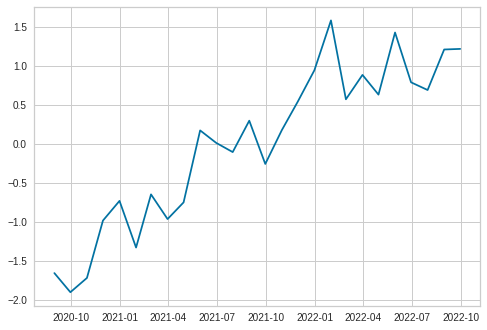

In [38]:
plt.plot(df['datetime'],df[merchants_list[0]])

# TSlearn

In [39]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
data_array = np.array(df.T.drop('datetime').values)
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(data_array)
merchants_list = df.T.drop('datetime').index.tolist()

In [41]:
y = model.predict(data_array)

In [42]:
x = df.datetime

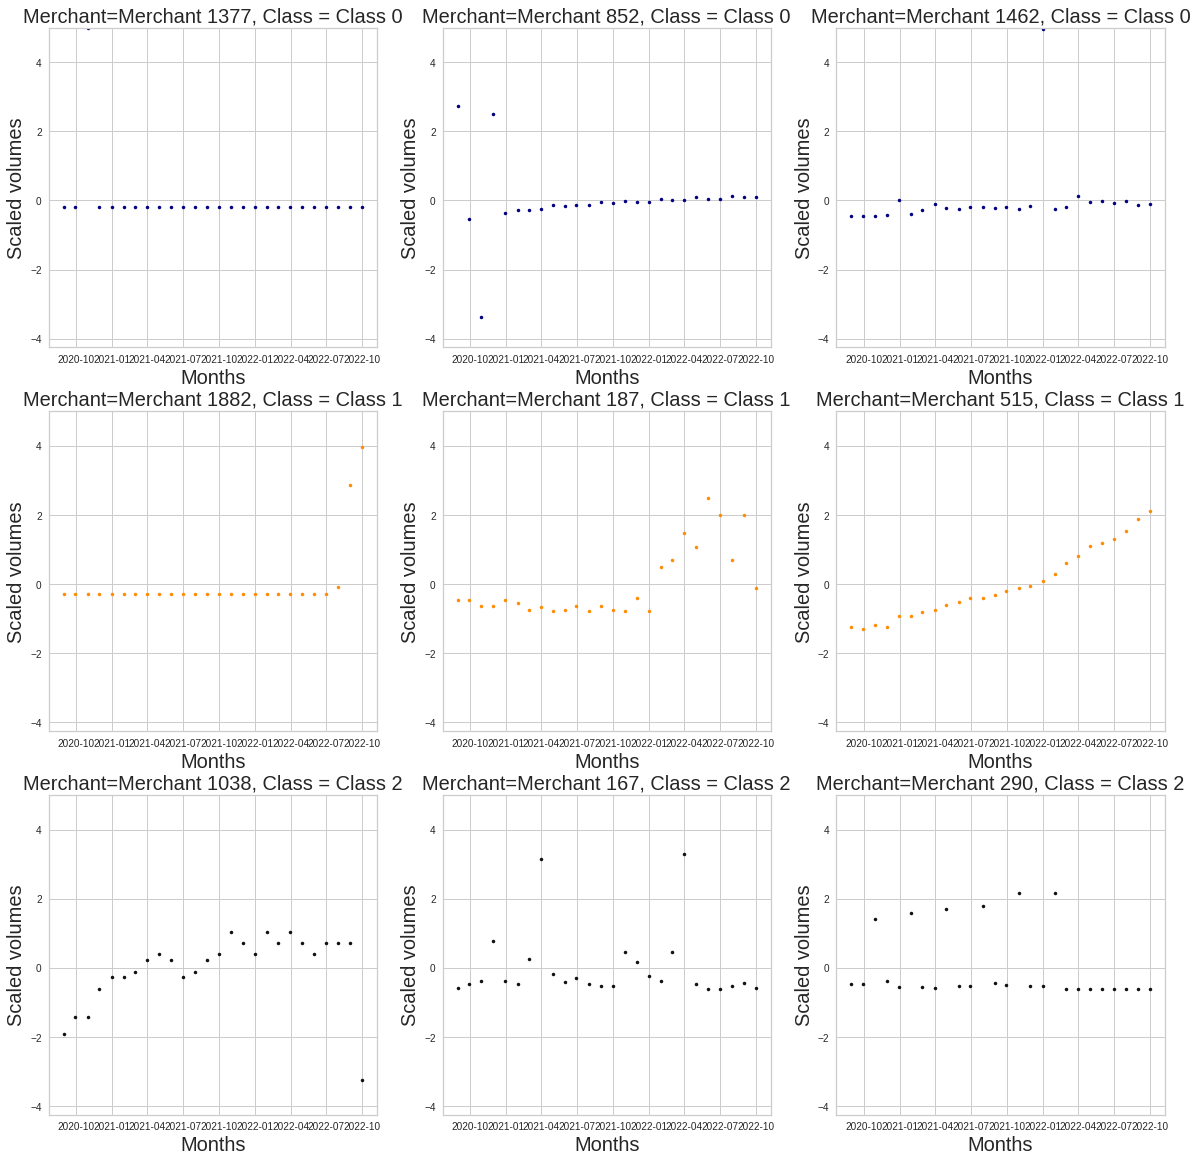

In [43]:
plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
colors = ['navy']*3+['darkorange']*3+['k']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3
for j in range(1,10):
    plt.subplot(3,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.plot(x,data_array[k],'.',color=colors[j-1])
    plt.ylabel('Scaled volumes',fontsize=20)
    plt.xlabel('Months',fontsize=20)
    plt.title('Merchant=%s, Class = %s'%(merchants_list[k],Names[j-1]),fontsize=20)
    plt.ylim(data_array.min(),data_array.max())

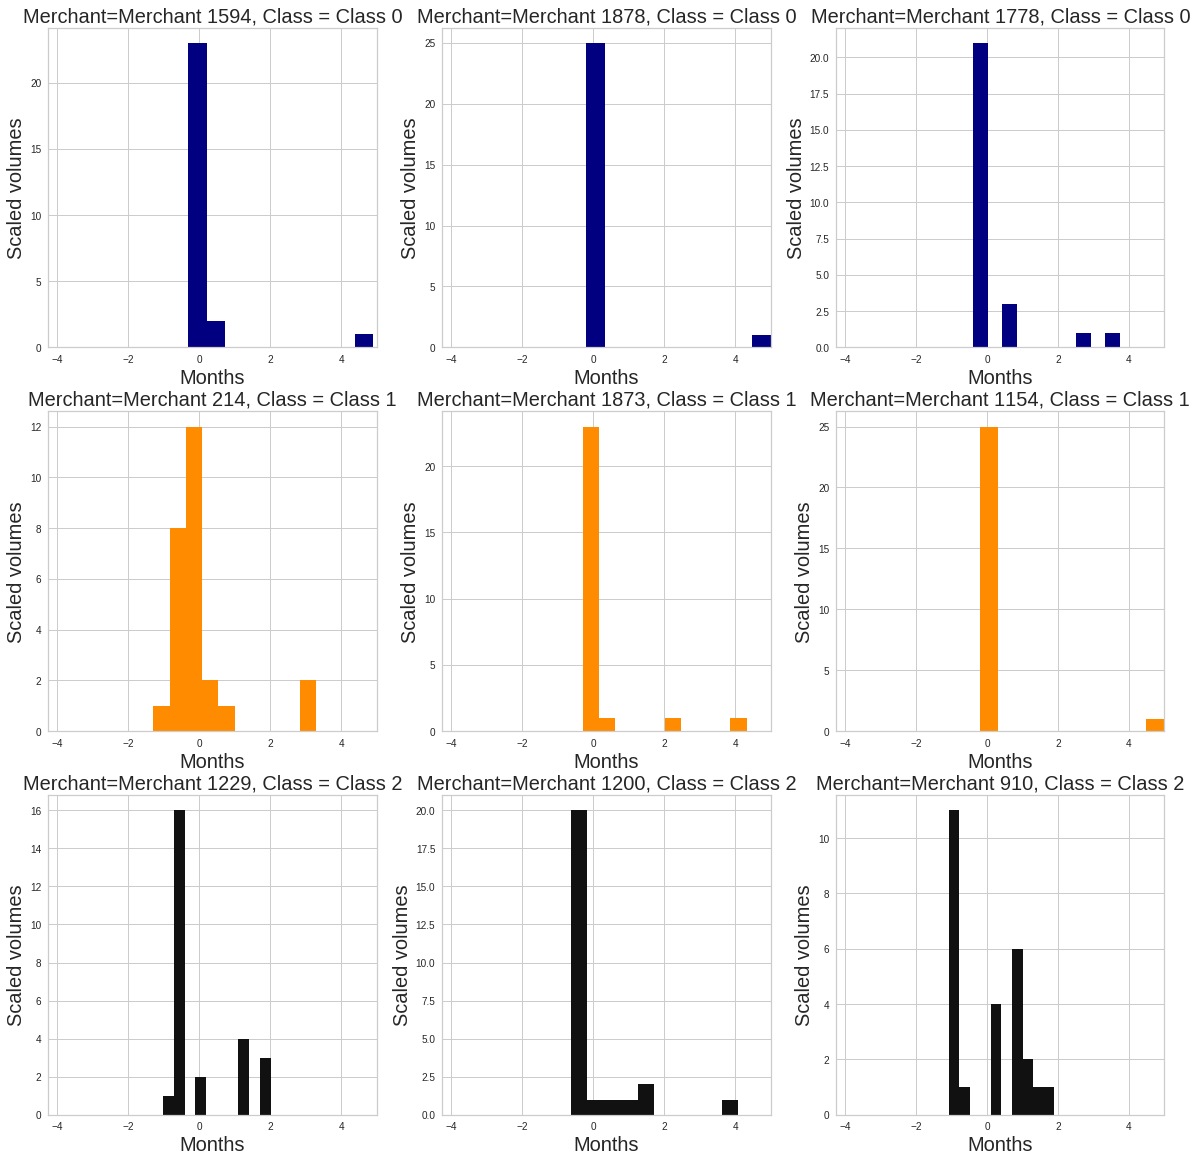

In [44]:
plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
colors = ['navy']*3+['darkorange']*3+['k']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3
for j in range(1,10):
    plt.subplot(3,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.hist(data_array[k],color=colors[j-1])
    plt.ylabel('Scaled volumes',fontsize=20)
    plt.xlabel('Months',fontsize=20)
    plt.title('Merchant=%s, Class = %s'%(merchants_list[k],Names[j-1]),fontsize=20)
    plt.xlim(data_array.min(),data_array.max())

In [45]:
# there is no additional information to plug in and display the data
# (like lat/long for cities and the volume of xyz)
# TSlearn not useful at this point